In [1]:
#importing libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#importing stock price of Amazon
data = web.DataReader('AMZN', data_source='yahoo', start='2010-01-01', end='2020-08-27')
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,136.610001,133.139999,136.250000,133.899994,7599900,133.899994
2010-01-05,135.479996,131.809998,133.429993,134.690002,8851900,134.690002
2010-01-06,134.729996,131.649994,134.600006,132.250000,7178800,132.250000
2010-01-07,132.320007,128.800003,132.009995,130.000000,11030200,130.000000
2010-01-08,133.679993,129.029999,130.559998,133.520004,9830500,133.520004


In [3]:
data.shape

(2682, 6)

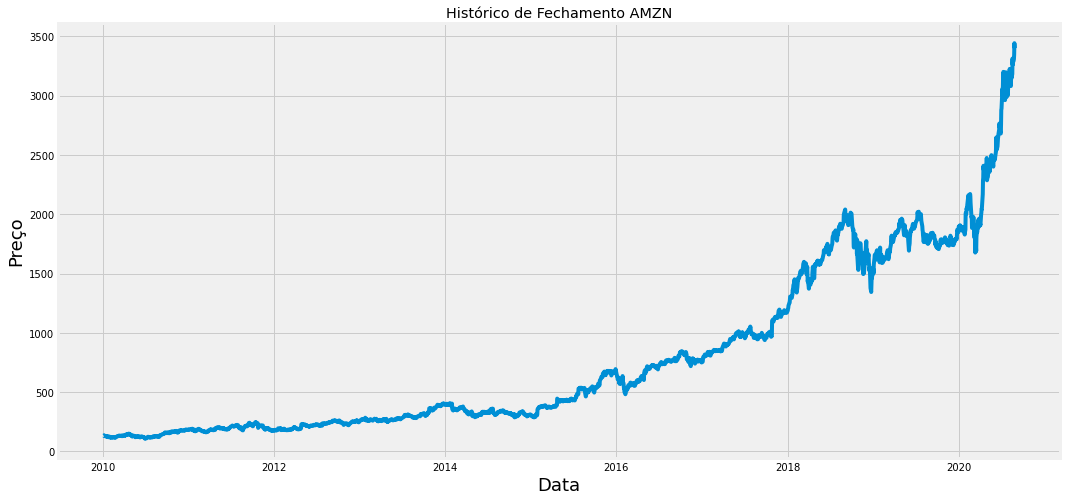

In [4]:
plt.figure(figsize=(16,8))
plt.title('Histórico de Fechamento AMZN')
plt.plot(data['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Preço', fontsize=18)
plt.show()

In [5]:
dataset = data.filter(['Close'])

In [6]:
close = dataset.values

In [7]:
training_close_len = math.ceil(len(close) * .8)
training_close_len

2146

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close)

In [9]:
scaled_data

array([[0.00758721],
       [0.00782422],
       [0.0070922 ],
       ...,
       [0.97139117],
       [1.        ],
       [0.98744462]])

In [10]:
 train_data = scaled_data[0:training_close_len, :]
 x_train = []
 y_train = []

 for i in range(60, len(train_data)):
   x_train.append(train_data[i-60:i, 0])
   y_train.append(train_data[i, 0])
   if i<=61:
     print(x_train)
     print(y_train)
     print()

[array([0.00758721, 0.00782422, 0.0070922 , 0.00641718, 0.00747321,
       0.00651018, 0.00562216, 0.00615017, 0.00562216, 0.00555916,
       0.00570016, 0.00515114, 0.00540315, 0.00384611, 0.0035101 ,
       0.00326109, 0.00424212, 0.00522615, 0.00504014, 0.00307809,
       0.00285308, 0.00314709, 0.00219906, 0.00263407, 0.00246607,
       0.00282608, 0.00262507, 0.0034441 , 0.00331509, 0.00267607,
       0.00231006, 0.00284108, 0.00267307, 0.00282008, 0.00258907,
       0.00333309, 0.00287708, 0.00293708, 0.00477913, 0.00507614,
       0.00518414, 0.00597617, 0.00609017, 0.00645018, 0.00606317,
       0.00657018, 0.00749121, 0.0069632 , 0.00675619, 0.00695419,
       0.00681919, 0.0072452 , 0.00652218, 0.00655818, 0.00619517,
       0.00582916, 0.00783622, 0.00793522, 0.00795322, 0.00839124])]
[0.008148229011819483]

[array([0.00758721, 0.00782422, 0.0070922 , 0.00641718, 0.00747321,
       0.00651018, 0.00562216, 0.00615017, 0.00562216, 0.00555916,
       0.00570016, 0.00515114, 0.0

In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
x_train = np.reshape(x_train, (2086, 60, 1))
x_train.shape

(2086, 60, 1)

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2086/2086 [==============================] - 48s 23ms/step - loss: 2.8294e-04


In [16]:
test_data = scaled_data[training_close_len - 60: , :]
x_test = []
y_test = close[training_close_len:,:]
for j in range(60, len(test_data)):
  x_test.append(test_data[j-60:j, 0])

In [17]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
predict = model.predict(x_test)
predict = scaler.inverse_transform(predict)

In [19]:
rmse = np.sqrt(np.mean(predict - y_test) ** 2)
rmse

15.951677692470266

In [20]:
train = dataset[:training_close_len]
valid = dataset[training_close_len:]
valid['Predict'] = predict

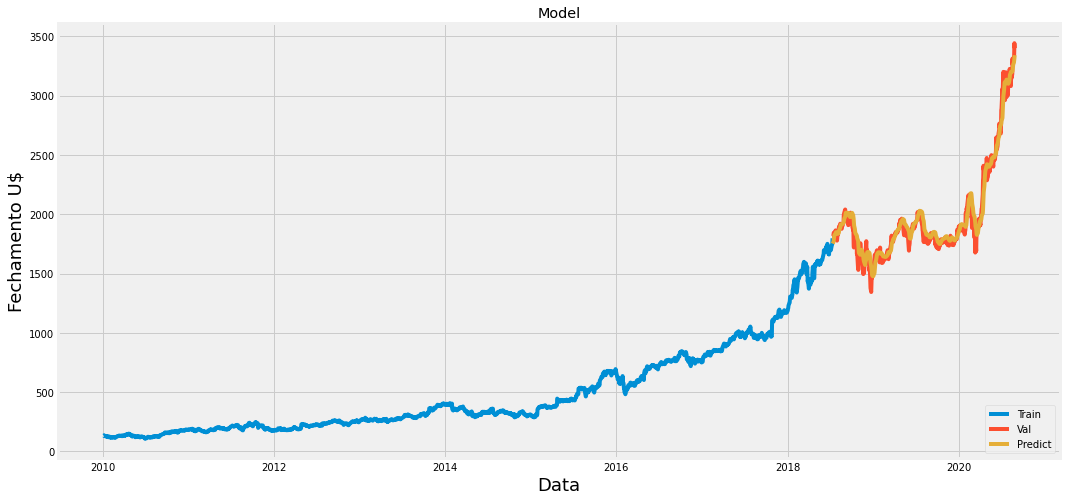

In [21]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Fechamento U$', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predict']])
plt.legend(['Train', 'Val', 'Predict'], loc='lower right')
plt.show()

In [22]:
valid

,Close,Predict
Date,,
2018-07-13,1813.030029,1751.857666
2018-07-16,1822.489990,1766.541016
2018-07-17,1843.930054,1782.079590
2018-07-18,1842.920044,1798.754639
2018-07-19,1812.969971,1814.226440
...,...,...
2020-08-21,3284.719971,3261.892822
2020-08-24,3307.459961,3278.860596
2020-08-25,3346.489990,3295.308838
